In [239]:
import pandas as pd # load and manipulate data and for One-Hot Encoding
import numpy as np # calculate the mean and standard deviation
import matplotlib.pyplot as plt # drawing graphs
from sklearn.tree import DecisionTreeClassifier # a classification tree
from sklearn.tree import plot_tree # draw a classification tree
from sklearn.model_selection import train_test_split # split  data into training and testing sets
from sklearn.model_selection import cross_val_score # cross validation
from sklearn.metrics import confusion_matrix # creates a confusion matrix
from sklearn.preprocessing import OneHotEncoder


In [240]:
df = pd.read_csv("processed.cleveland.data", header=None)

In [241]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [242]:
df.columns = ['age',
              'sex',
              'cp',
              'restbp',
              'chol',
              'fbs',
              'restecg',
              'thalach',
              'exang',
              'oldpeak',
              'slope',
              'ca',
              'thal',
              'hd']

In [243]:
df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [244]:
df.drop(index = np.where(df.iloc[:,:]=='?')[0],inplace=True)

In [245]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [246]:
# X = pd.get_dummies(X,columns=['cp','restecg','ca','slope'])

In [247]:
y = y.apply(lambda x:0 if x==0 else 1)

In [248]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

In [249]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [250]:
dt.score(X_train,y_train)

1.0

In [251]:
dt.score(X_test,y_test)

0.7466666666666667

In [252]:
path  = dt.cost_complexity_pruning_path(X_train,y_train)

In [253]:
path.ccp_alphas

array([0.        , 0.00295295, 0.003861  , 0.003861  , 0.00405405,
       0.00429358, 0.00514801, 0.00578761, 0.00600601, 0.00600601,
       0.00600601, 0.00600601, 0.0063593 , 0.00655201, 0.00667591,
       0.00757375, 0.00796251, 0.00811505, 0.01038181, 0.0105777 ,
       0.01422475, 0.01604051, 0.01642461, 0.02103075, 0.03680006,
       0.03934523, 0.13046216])

In [254]:
all_model = {}
for i in path.ccp_alphas:
  dt = DecisionTreeClassifier(ccp_alpha=i,random_state=42)
  dt.fit(X_train,y_train)
  all_model[i] = dt



In [255]:
from sklearn.model_selection import cross_val_score
scores = {}
for i in path.ccp_alphas:
  dt = DecisionTreeClassifier(ccp_alpha=i,random_state=42)
  score = cross_val_score(dt,X_train,y_train,cv=5,scoring='accuracy')
  scores[i] = score.mean()



In [256]:
{alpha: model.score(X_test,y_test) for alpha, model in all_model.items()}

{np.float64(0.0): 0.6533333333333333,
 np.float64(0.0029529529529529544): 0.6533333333333333,
 np.float64(0.003861003861003862): 0.68,
 np.float64(0.004054054054054055): 0.68,
 np.float64(0.004293579293579285): 0.7466666666666667,
 np.float64(0.005148005148005147): 0.7466666666666667,
 np.float64(0.005787605787605791): 0.76,
 np.float64(0.006006006006006006): 0.7866666666666666,
 np.float64(0.0063593004769475344): 0.7866666666666666,
 np.float64(0.006552006552006554): 0.8,
 np.float64(0.006675906675906675): 0.8,
 np.float64(0.007573750220809049): 0.8,
 np.float64(0.007962507962507963): 0.8,
 np.float64(0.008115048793014888): 0.8133333333333334,
 np.float64(0.01038181038181038): 0.8133333333333334,
 np.float64(0.010577695922523535): 0.8133333333333334,
 np.float64(0.014224751066856332): 0.8266666666666667,
 np.float64(0.01604051214729746): 0.8266666666666667,
 np.float64(0.016424613198806746): 0.8533333333333334,
 np.float64(0.0210307473465368): 0.8533333333333334,
 np.float64(0.0368000

In [257]:
dt = DecisionTreeClassifier(ccp_alpha=0.0210307473465368,random_state=42)
dt.fit(X_train,y_train)
dt.score(X_test,y_test)


0.8533333333333334

[Text(0.5, 0.8333333333333334, 'x[11] <= 0.5\ngini = 0.498\nsamples = 222\nvalue = [118, 104]'),
 Text(0.25, 0.5, 'x[12] <= 6.5\ngini = 0.382\nsamples = 132\nvalue = [98, 34]'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'gini = 0.24\nsamples = 93\nvalue = [80.0, 13.0]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.497\nsamples = 39\nvalue = [18, 21]'),
 Text(0.75, 0.5, 'x[2] <= 3.5\ngini = 0.346\nsamples = 90\nvalue = [20, 70]'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'gini = 0.499\nsamples = 31\nvalue = [16, 15]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.126\nsamples = 59\nvalue = [4, 55]')]

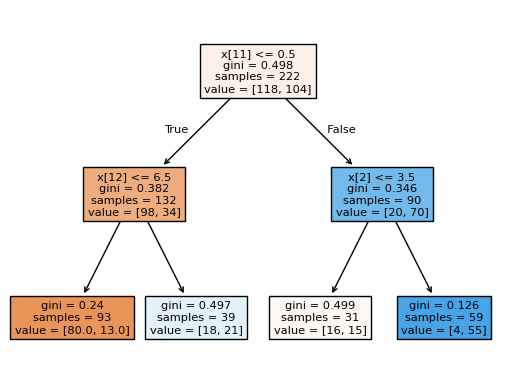

In [258]:
from sklearn.tree import plot_tree
plot_tree(dt,filled=True)

In [259]:
confusion_matrix(y_test,dt.predict(X_test))

array([[38,  4],
       [ 7, 26]])